# **Group Project Notebook: Machine Learning II**
## By Group 3

##### Team Members: IGNACIO ALONSO LÓPEZ-LINARES, KATHERINE BADE, BAPTISTE RICHARD, ZEYAD ALHOUTI, ANABELÉN GUERRA GARCÍA, ENRICO BONILAURI



This project focusses on exploring and developing a machine learning model for the Smoke status synthetic dataset from: https://www.kaggle.com/competitions/playground-series-s3e24/overview

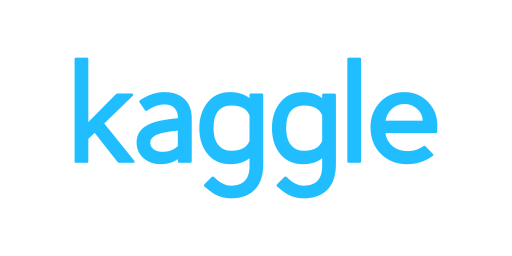

### **Loading the required libraries**

In [21]:
# Importing needed libraries
import pandas as pd
import numpy as np

#Visualization
import seaborn as sns 
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.figure_factory as ff

#Analytics and ML Libraries
#import ydata_profiling as ProfileReport

from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, LogisticRegression
from sklearn.linear_model import SGDClassifier, SGDRegressor
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error, r2_score, roc_curve, roc_auc_score, auc, accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
import xgboost as xgb
import graphviz
import pydotplus
from io import StringIO
from IPython.display import Image
from sklearn import tree

### **Loading the data**

In [2]:
# Upload train and test datasets
train = pd.read_csv("data/train.csv")
test = pd.read_csv("data/test.csv")

### **Exploratory Data Analysis for Smoke Status**

#### Now, we will begin with EDA (Exploratory Data Analysis), to understand the nature of the train and test sets

**Brief Summary of all variables**

**id**: Unique identifier for each data entry.

**age**: Age of the individual.

**height(cm)**: Height of the individual in centimeters.

**weight(kg)**: Weight of the individual in kilograms.

**waist(cm)**: Waist circumference in centimeters.

**eyesight(left)**: Eyesight measurement for the left eye.

**eyesight(right)**: Eyesight measurement for the right eye.

**hearing(left)**: Hearing measurement for the left ear.

**hearing(right)**: Hearing measurement for the right ear.

**systolic**: Systolic blood pressure.

**cholesterol**: Cholesterol level.

**HDL**: High-Density Lipoprotein (HDL) cholesterol level.

**LDL**: Low-Density Lipoprotein (LDL) cholesterol level.

**hemoglobin**: Hemoglobin level.

**Urine protein**: Urine protein measurement.

**serum creatinine**: Serum creatinine level.

**AST**: Aspartate Aminotransferase (AST) level.

**ALT**: Alanine Aminotransferase (ALT) level.

**Gtp**: Gamma-Glutamyl Transferase (Gtp) level.

**dental caries**: Dental caries indicator.

**smoking**: Smoking status (0: non-smoker, 1: smoker).

In [ ]:
# Take a look at train data, it seems all variables are numerical and it contains no nulls!
train.info()

In [ ]:
train.head()

In [ ]:
train.describe()

# The age ranges from 20 to 70 years. The height ranges from 135 to 213 cm, and the weight from 30 to 186 kg.

In [3]:
# Set index using ID column, then drop ID column
train = train.set_index(train["id"])
train = train.drop(["id"], axis=1)

# Do the same for test data
test = test.set_index(test["id"])
test = test.drop(["id"], axis=1)

In [ ]:
# Double check for nulls - none
train.isnull().sum()

Binary Variables: Understanding the data intrinsic nature, we figure that Hearing take the value 1 and 2, whereas the other two varibles take 0 and 1. 

In [ ]:
# Hearing is binary
train.groupby("hearing(left)")["hearing(left)"].count()

In [ ]:
# Dental caries is also binary
train.groupby("dental caries")["dental caries"].count()

In [ ]:
# Urine protein is categorical
train.groupby("Urine protein")["Urine protein"].count()

In [ ]:
# Smoking is also binary
train.groupby("smoking")["smoking"].count()

In [4]:
# Change hearing into 0 and 1 binary numbers

def binary(column):
    if column == 1:
        return 0
    elif column == 2:
        return 1

train["hearing(left)"] = train["hearing(left)"].apply(binary)
train["hearing(right)"] = train["hearing(right)"].apply(binary)

# Do the same for test data
test["hearing(left)"] = test["hearing(left)"].apply(binary)
test["hearing(right)"] = test["hearing(right)"].apply(binary)

In [ ]:
train.head()

Let's start charting by discovering distributions

We will start by variables that have high values ranges

In [ ]:
#List of all feactures
all_features = ['age','height(cm)', 'weight(kg)', 'waist(cm)', 
                'eyesight(left)', 'eyesight(right)', 'hearing(left)',
                'hearing(right)','systolic','relaxation','fasting blood sugar',
                'Cholesterol','triglyceride','HDL','LDL','hemoglobin','Urine protein',
                'serum creatinine','AST','ALT','Gtp','dental caries'
                ]

# List of numerical features to plot
numerical_features = [
    'age', 'height(cm)', 'weight(kg)', 'waist(cm)','systolic', 'relaxation', 'fasting blood sugar',
    'Cholesterol', 'triglyceride', 'HDL',  'hemoglobin','eyesight(left)', 'eyesight(right)', 'LDL','serum creatinine','AST', 'ALT', 'Gtp'
]

# List of categorical features to plot
categorical_features = [
'hearing(left)', 'hearing(right)', 'dental caries','Urine protein', 'smoking']

We will examine first **numerical features**

In [ ]:
# Create subplots
fig, axes = plt.subplots(nrows=3, ncols=6, figsize=(18, 12))
fig.subplots_adjust(hspace=0.5)

# Iterate through numerical features and plot their distributions
for i, feature in enumerate(numerical_features):
    row, col = divmod(i, 6)
    sns.histplot(train[feature], bins=20, kde=True, ax=axes[row, col])
    axes[row, col].set_title(f'{feature} Distribution')
    axes[row, col].set_xlabel('')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

#little values: 
#'hearing(left)', 'hearing(right)', dental caries,'Urine protein'

In [ ]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_features, 1):
    plt.subplot(4, 5, i)
    sns.boxplot(y=train[col])
    plt.title(col)
plt.tight_layout()
plt.show()

Ok, seems that most variables are normally distributed...but it might be good to apply a gaussian-like formula and scale the data for linear models, as there is a wide range of values magnitudes depending on the selected variable.

Let's do the same for **categorical variables** in the dataset.

In [ ]:
plt.figure(figsize=(15, 5))
for i, col in enumerate(categorical_features,1):
    plt.subplot(1, 5, i)
    sns.countplot(x=col, data=train)

plt.tight_layout()
plt.show()


This is quite nice to know, as we have a balanced target variable, so we do not suffer class imbalance. Now, we are going to go one step forward. 

Let's look at the **relationship between ALL features with each other**

In [ ]:
# Create a pairplot for all numerical features
sns.pairplot(data=train[all_features])
plt.suptitle("Pairplot of All Numerical Features", y=1.02, fontsize=16)
plt.show()

This would be the equivalent to a Correlation Matrix, but plotted... we can see some relationships already between systolic and relaxation... as well as weight and waist.

We believe that calculating a **correlation matrix** is a better alternative to visualize this trends and detect **Multicollinearity**. We will use Pearson's coefficient as the default choice, calculated with the .corr method, and Seaborn first

In [ ]:

# Assuming 'train' is your pandas DataFrame
correlation = train.corr().abs()

# Create a heatmap with reversed diagonal values
plt.figure(figsize=(30, 15))
sns.heatmap(correlation, cmap='Blues', fmt=".2f", square=True, cbar=True)

# Rotate the tick labels on the x-axis for better readability
plt.xticks(rotation=45)

# Set the title for the heatmap
plt.title('Correlation Matrix', fontsize=16)

# Show the heatmap
plt.show()

Let's build it in an **interactive way** using Plotly now!

In [ ]:

# Assuming 'train' is your pandas DataFrame
correlation = train.corr().abs()

# Create a heatmap with reversed diagonal values
fig = ff.create_annotated_heatmap(
    z=correlation.values,
    x=list(correlation.columns),
    y=list(correlation.index),
    annotation_text=correlation.values.round(2).astype(str),  # Use original values for annotations
    showscale=True,
    colorscale='Blues'
)

# Update layout to make it more readable
fig.update_layout(
    title={
        'text': 'Reversed Diagonal Correlation Matrix',  # Update title
        'y': 0.9,  # Adjust title position
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    },
    title_font=dict(size=24, family='Verdana'),
    xaxis=dict(tickangle=45, side='top', automargin=True),  # Rotate x-axis labels and enable auto margin
    yaxis=dict(tickmode='array', automargin=True),
    autosize=False,  # Disable autosize to set custom width and height
    width=1200,  # Increase width if needed
    height=1200,  # Increase height if needed
    margin=dict(l=150, r=150, b=100, t=235),  # Adjust margins to fit labels, increase top margin
)

# Show the reversed diagonal figure
fig.show()

Let's apply a **threshold** so that we see only the largest correlations in Plotly

In [ ]:
# Assuming 'train' is your pandas DataFrame
correlation = train.corr().abs()

# Apply threshold
threshold = 0.55
correlation_masked = correlation.where(correlation > threshold, np.nan)  # Apply threshold mask

# Prepare annotation text, masking out entries below the threshold
annotation_text = correlation_masked.applymap(lambda entry: f'{entry:.2f}' if not np.isnan(entry) else '')

# Create a heatmap
fig = ff.create_annotated_heatmap(
    z=correlation_masked.values,
    x=list(correlation_masked.columns),
    y=list(correlation_masked.index),
    annotation_text=annotation_text.values,
    showscale=True,
    colorscale='Blues'
)

# Update layout to make it more readable and to adjust for any overlap
fig.update_layout(
    title={
        'text': 'Correlation Matrix',
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    },
    title_font=dict(size=24, family='Verdana'),
    xaxis=dict(tickangle=45, side='top', automargin=True),
    yaxis=dict(tickmode='array', automargin=True),
    autosize=False,
    width=1200,
    height=1200,
    margin=dict(l=150, r=150, b=100, t=235),
)

# Show the figure
fig.show()



Okay, so we have indeed confirmed the most strong relationships... Let's plot them using a 3D chart (by using hue: Smoking) to identify and see if there is an underlying trend

In [ ]:

# Create scatter plots
fig = px.scatter(train, x='systolic', y='relaxation', color='smoking', title='Scatter Plot: Systolic vs Relaxation')
fig.update_xaxes(title_text='Systolic')
fig.update_yaxes(title_text='Relaxation')

fig2 = px.scatter(train, x='Cholesterol', y='LDL', color='smoking', title='Scatter Plot: Cholesterol vs LDL')
fig2.update_xaxes(title_text='Cholesterol')
fig2.update_yaxes(title_text='LDL')

fig3 = px.scatter(train, x='weight(kg)', y='waist(cm)', color='smoking', title='Scatter Plot: Weight vs Waist')
fig3.update_xaxes(title_text='Weight (kg)')
fig3.update_yaxes(title_text='Waist (cm)')

# Arrange the subplots
fig.update_layout(
    height=600,
    showlegend=True
)

fig2.update_layout(
    height=600,
    showlegend=True
)

fig3.update_layout(
    height=600,
    showlegend=True
)

# Show the scatter plots
fig.show()
fig2.show()
fig3.show()


Okay, let's now see what is **the distribution of the different explanatory features based on the target feature smoking**. 
This was done also on the pairplot but it was very difficult to examine. Let's see it here :D!

In [ ]:
# Distribution of the target variable
num_rows = len(all_features)
num_cols = 3 

total_plots = num_rows * num_cols
plt.figure(figsize=(14, num_rows * 2.5))

for idx, col in enumerate(all_features):
    plt.subplot(num_rows, num_cols, idx % total_plots + 1)
    sns.boxplot(x=train['smoking'], y=col, data=train)
    plt.title(f"{col} Distribution for target")

plt.tight_layout()
plt.show()


**Conclusion:**

**Okay, we believe it is enough with this preview. From this series of charts, we have been able to see that hemoglobin could be the most important factor when determining a smoker as they have higher values in general for almost every observation in the sample. Furthermore, triglyceride, weight/waist/height, age, HDL or relaxation/systolic will have an influence in determining if a person smokes or not**

## **Feature Selection & Engineering**

There is especially high (>0.60) correlation between: waist + weight; LDL + cholesterol; relaxation + systolic; weight + height; AST + ALT. We will drop one per pair to avoid multicollinearity

In [5]:
train_drop = train.drop(["waist(cm)","LDL","relaxation","height(cm)","AST"], axis=1)

# Drop the same features in test dataset
test = test.drop(["waist(cm)","LDL","relaxation","height(cm)","AST"], axis=1)

We will now split the data into X (explanatory/independent variable) and Y (target/dependent variable). Since this is a Kaggle Competition, the Y value in the test set is not present as our performance will be compared against this hidden variable

In [6]:
# Split train set into X and y
X_train = train_drop.drop("smoking", axis=1).values 
y_train = train_drop["smoking"].values

# Test set does not have a y, since that is what we are predicting. So we will just rename the table as X:
kaggle_X_test = test.values

In [7]:
# In order to test the train data, since the test data does not have the target variable, must split the train data into a pseudo test and psuedo train dataset
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, random_state=42, test_size=0.3)

In [8]:
# Use DecisionTreeClassifier (vs DecisionTreeRegressor) because target variable is categorical - yes and no
# Accuracy of 68%
smoking = DecisionTreeClassifier(random_state=42)
print("Accuracy = {0:.4f}".format(np.mean(cross_val_score(smoking, X_train, y_train))))

Accuracy = 0.6827


In [9]:
# Fit decision tree
smoking = smoking.fit(X_train,y_train)

In [10]:
from sklearn.model_selection import GridSearchCV
param_grid = {'max_depth': range(1,16)}

crossval = GridSearchCV(smoking, 
                   param_grid,
                   scoring='accuracy',
                   cv=5 , n_jobs=1, verbose=1)

crossval.fit(X_train,y_train);

Fitting 5 folds for each of 15 candidates, totalling 75 fits


In [11]:
# Ideal depth is 9
print("Best parameters set found on train set:")
print()
print(crossval.best_params_)
print()
print("Grid scores on train set:")
print()
means = crossval.cv_results_['mean_test_score']
stds = crossval.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, crossval.cv_results_['params']):
    print("Accuracy = %0.3f (+/%0.03f) for %r" % (mean, std * 2, params))

Best parameters set found on train set:

{'max_depth': 9}

Grid scores on train set:

Accuracy = 0.691 (+/0.004) for {'max_depth': 1}
Accuracy = 0.717 (+/0.004) for {'max_depth': 2}
Accuracy = 0.723 (+/0.008) for {'max_depth': 3}
Accuracy = 0.735 (+/0.005) for {'max_depth': 4}
Accuracy = 0.737 (+/0.008) for {'max_depth': 5}
Accuracy = 0.744 (+/0.004) for {'max_depth': 6}
Accuracy = 0.744 (+/0.005) for {'max_depth': 7}
Accuracy = 0.747 (+/0.003) for {'max_depth': 8}
Accuracy = 0.748 (+/0.006) for {'max_depth': 9}
Accuracy = 0.746 (+/0.006) for {'max_depth': 10}
Accuracy = 0.742 (+/0.003) for {'max_depth': 11}
Accuracy = 0.739 (+/0.004) for {'max_depth': 12}
Accuracy = 0.733 (+/0.004) for {'max_depth': 13}
Accuracy = 0.727 (+/0.004) for {'max_depth': 14}
Accuracy = 0.723 (+/0.008) for {'max_depth': 15}


Text(0, 0.5, 'Accuracy')

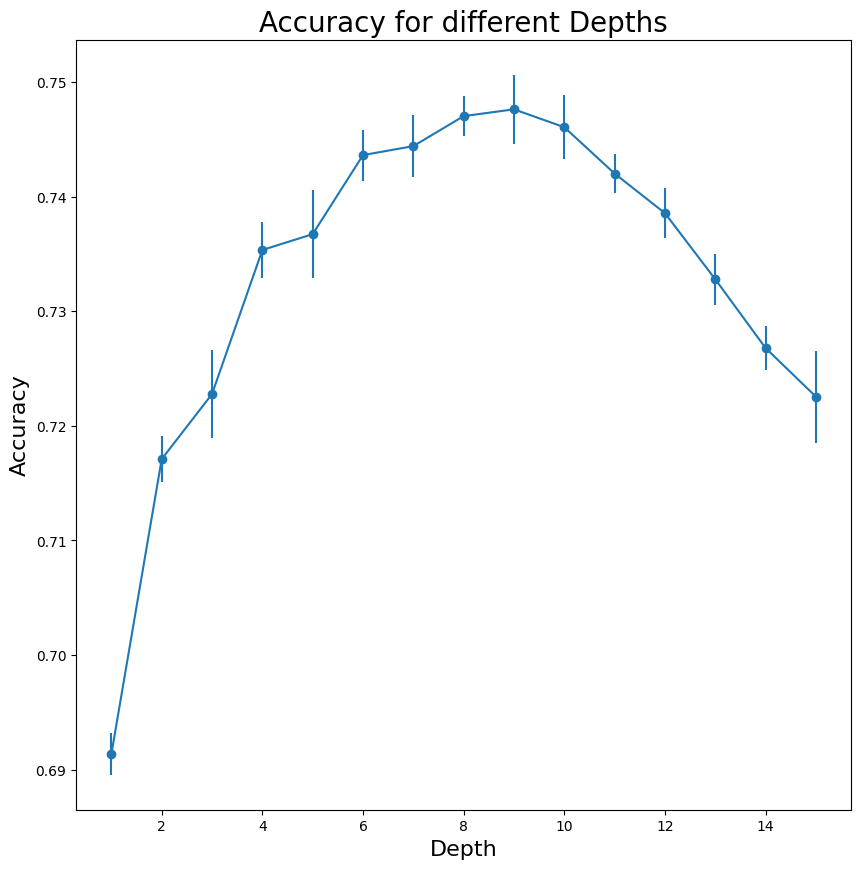

In [12]:
# Visualize the different accuracies for different depths of the decision tree
plt.figure(figsize=(10,10))
plt.errorbar(range(1,16,1), [m for m in means], yerr=stds, fmt='-o')
plt.title('Accuracy for different Depths', fontsize=20)
plt.xlabel("Depth", fontsize=16)
plt.ylabel("Accuracy", fontsize=16)

Text(0.5, 1.0, 'Feature Importance')

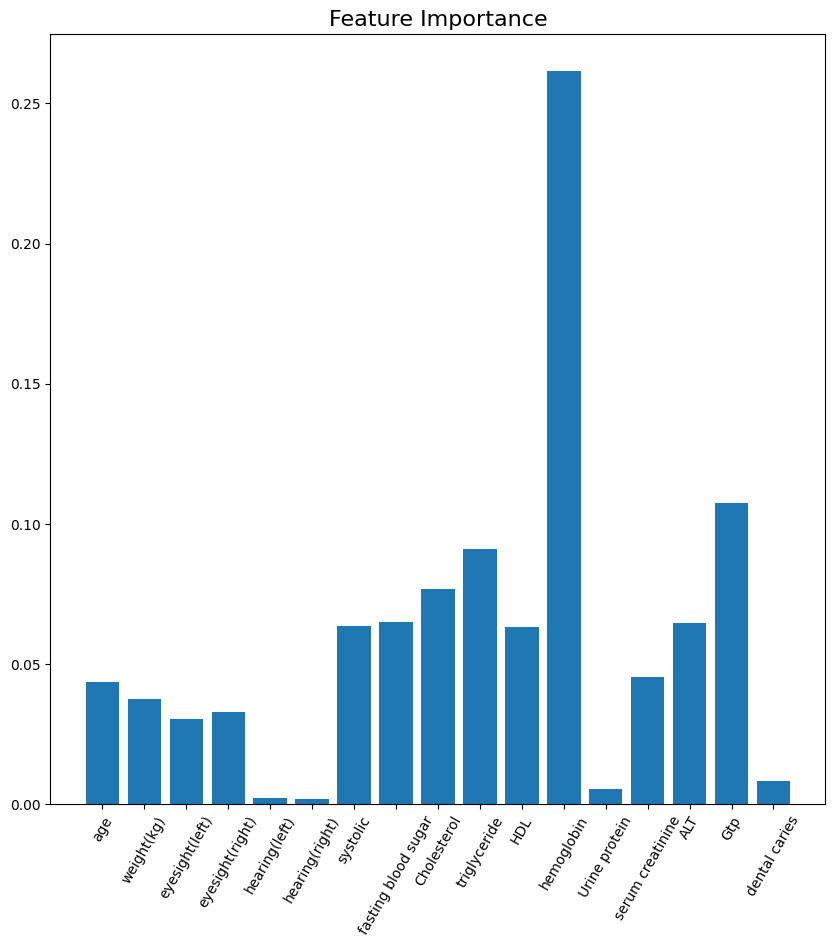

In [13]:
# Visualize importance of various features
plt.figure(figsize=(10,10))
plt.bar(["age","weight(kg)","eyesight(left)","eyesight(right)","hearing(left)","hearing(right)","systolic","fasting blood sugar","Cholesterol","triglyceride","HDL","hemoglobin","Urine protein","serum creatinine","ALT","Gtp","dental caries"], smoking.feature_importances_)
plt.xticks(rotation=60)
plt.title('Feature Importance', fontsize=16)

# Hemoglobin is by far the most important feature
# Hearing(left and right), Urine protein, and dental caries all appear to be very unimportant

In [14]:
# Prune to a depth of 9
# Accuracy is now 75% - improved
smoking_pruned = DecisionTreeClassifier(random_state=42,max_depth=9)
print("Accuracy = {0:.4f}".format(np.mean(cross_val_score(smoking_pruned, X_train, y_train))))

Accuracy = 0.7476


In [15]:
# Fit model
smoking_pruned.fit(X_train,y_train)

In [24]:
# 74% accuracy on pseudo test set, too - super close to train set, not overfitted
print("Accuracy = {0:.4f}".format(np.mean(cross_val_score(smoking_pruned, X_test, y_test))))

Accuracy = 0.7418


In [19]:
# Text visualization of the pruned tree
text_representation = tree.export_text(smoking_pruned)
print(text_representation)

|--- feature_11 <= 14.35
|   |--- feature_13 <= 0.85
|   |   |--- feature_0 <= 37.50
|   |   |   |--- feature_9 <= 90.50
|   |   |   |   |--- feature_11 <= 13.15
|   |   |   |   |   |--- feature_10 <= 83.00
|   |   |   |   |   |   |--- feature_8 <= 142.50
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- feature_8 >  142.50
|   |   |   |   |   |   |   |--- feature_8 <= 231.00
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- feature_8 >  231.00
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- feature_10 >  83.00
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_11 >  13.15
|   |   |   |   |   |--- feature_8 <= 220.50
|   |   |   |   |   |   |--- feature_9 <= 33.50
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- feature_9 >  33.50
|   |   |   |   |   |   |   |--- feature_0 <= 22.50
|   |   |   |   |   |   |   |   |--- feature_2 <= 0.85
|   |   |   |   |   |   |   |   |   |--- 

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.452433 to fit



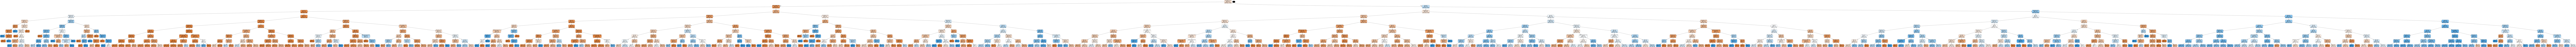

In [22]:
# Visualization of the decision tree
dot_data = StringIO()
export_graphviz(smoking_pruned.fit(X_train,y_train), out_file=dot_data, feature_names=["age","weight(kg)","eyesight(left)","eyesight(right)","hearing(left)","hearing(right)","systolic","fasting blood sugar","Cholesterol","triglyceride","HDL","hemoglobin","Urine protein","serum creatinine","ALT","Gtp","dental caries"],
                filled=True, rounded=True,special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [29]:
# Try random forest classifier 
# Slightly increases accuracy: 77%
random_forest = RandomForestClassifier(random_state=42, max_features='sqrt')  
print("Accuracy = {0:.4f}".format(np.mean(cross_val_score(random_forest, X_train, y_train))))

Accuracy = 0.7665


In [30]:
# Fit random forest decision tree
random_forest.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

Text(0.5, 1.0, 'Feature Importance')

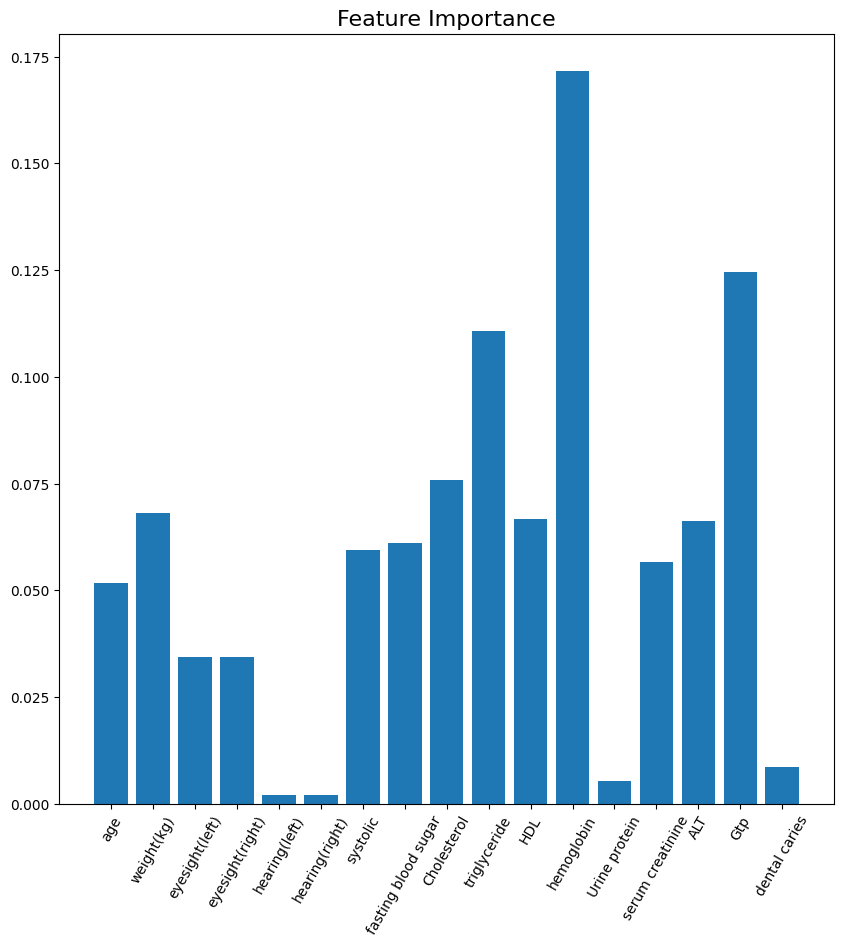

In [39]:
# Plot feature importances for the random forest
# Other features besides hemoglobin now have increased importance in the model
plt.figure(figsize=(10,10))
plt.bar(["age","weight(kg)","eyesight(left)","eyesight(right)","hearing(left)","hearing(right)","systolic","fasting blood sugar","Cholesterol","triglyceride","HDL","hemoglobin","Urine protein","serum creatinine","ALT","Gtp","dental caries"], random_forest.feature_importances_)
plt.xticks(rotation=60)
plt.title('Feature Importance', fontsize=16)

In [41]:
# Try random forest classifier on pseudo test set
# 76% accuracy - very close to training accuracy
print("Accuracy = {0:.4f}".format(np.mean(cross_val_score(random_forest, X_test, y_test))))

Accuracy = 0.7634
